# Decision Trees


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt

In [2]:
mydataset = pd.read_csv("diabetes.csv", header=None)
mydataset.head()

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

mydataset = pd.read_csv("diabetes.csv", header=None, names=col_names)
mydataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [4]:
mydataset=mydataset.iloc[1:]
mydataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [5]:
mydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Glucose                   768 non-null    object
 2   BloodPressure             768 non-null    object
 3   SkinThickness             768 non-null    object
 4   Insulin                   768 non-null    object
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    object
 8   Outcome                   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [6]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = mydataset[feature_cols] 
y = mydataset.Outcome 

In [7]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
764,10,180,32.9,63,101,76,0.171
765,2,0,36.8,27,122,70,0.34
766,5,112,26.2,30,121,72,0.245
767,1,0,30.1,47,126,60,0.349


In [8]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: Outcome, Length: 768, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
89,15,110,37.1,43,136,70,0.153
468,0,100,36.8,25,97,64,0.6
551,1,0,27.4,21,116,70,0.204
148,2,119,30.5,34,106,64,1.4
482,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
646,2,440,39.4,30,157,74,0.134
716,7,392,33.9,34,187,50,0.826
73,13,0,43.4,42,126,90,0.583
236,4,0,43.6,26,171,72,0.479


In [11]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
286,7,135,26,51,136,74,0.647
102,1,0,26.1,22,151,60,0.179
582,6,0,25,27,109,60,0.206
353,3,0,34.4,46,61,82,0.243
727,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
242,4,88,33.1,22,91,70,0.446
600,1,120,23.1,26,109,38,0.407
651,1,100,25.2,23,91,54,0.234
12,10,0,38,34,168,74,0.537


In [12]:
y_train

89     1
468    0
551    0
148    0
482    0
      ..
646    0
716    1
73     1
236    1
38     1
Name: Outcome, Length: 537, dtype: object

In [13]:
y_test

286    0
102    0
582    0
353    0
727    0
      ..
242    0
600    0
651    0
12     1
215    1
Name: Outcome, Length: 231, dtype: object

In [14]:
myclassifier = DecisionTreeClassifier()

myclassifier = myclassifier.fit(X_train,y_train)

In [15]:
y_pred = myclassifier.predict(X_test)
y_pred

array(['0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [17]:
mysecondclassifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

mysecondclassifier = mysecondclassifier.fit(X_train,y_train)

y_pred = mysecondclassifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [18]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
764,10,180,32.9,63,101,76,0.171
765,2,0,36.8,27,122,70,0.34
766,5,112,26.2,30,121,72,0.245
767,1,0,30.1,47,126,60,0.349


In [19]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: Outcome, Length: 768, dtype: object

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    object
 1   Insulin                   768 non-null    object
 2   BMI                       768 non-null    object
 3   Age                       768 non-null    object
 4   Glucose                   768 non-null    object
 5   BloodPressure             768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
dtypes: object(7)
memory usage: 42.1+ KB


In [21]:
X.describe()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
count,768,768,768,768,768,768,768
unique,17,186,248,52,136,47,517
top,1,0,32,22,99,70,0.258
freq,135,374,13,72,17,57,6


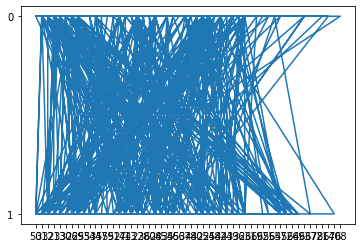

In [30]:
plt.plot(X["Age"],mydataset["Outcome"])

<AxesSubplot:xlabel='Pregnancies', ylabel='DiabetesPedigreeFunction'>

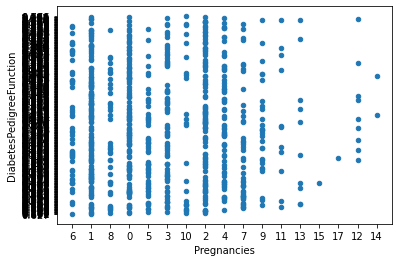

In [23]:
X.plot(x="Pregnancies",y="DiabetesPedigreeFunction",kind="scatter")

<AxesSubplot:xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

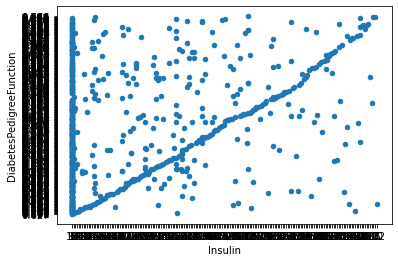

In [24]:
X.plot(x="Insulin",y="DiabetesPedigreeFunction",kind="scatter")

<AxesSubplot:xlabel='Age', ylabel='DiabetesPedigreeFunction'>

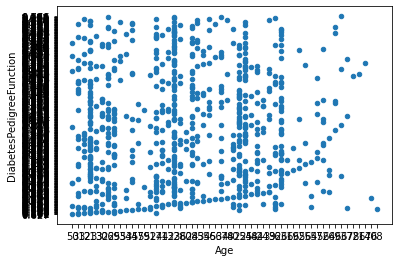

In [25]:
X.plot(x="Age",y="DiabetesPedigreeFunction",kind="scatter")